# Loan Default Prediction

Dataset: https://www.kaggle.com/competitions/loan-default-prediction

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Data Reading

In [6]:
filePath = "data/train_v2.csv"
df = pd.read_csv(filePath)
df.head(10)

/var/folders/31/jxw1k_rs1cg66vdyd48c2ws00000gn/T/ipykernel_31299/3865471523.py:3: DtypeWarning: Columns (135,204,274,417) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filePath)


,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f770,f771,f772,f773,f774,f775,f776,f777,f778,loss
0,1,126,10,0.686842,1100,3,13699,7201.0,4949.0,126.75,...,5,2.14,-1.54,1.18,0.1833,0.7873,1,0,5,0
1,2,121,10,0.782776,1100,3,84645,240.0,1625.0,123.52,...,6,0.54,-0.24,0.13,0.1926,-0.6787,1,0,5,0
2,3,126,10,0.500080,1100,3,83607,1800.0,1527.0,127.76,...,13,2.89,-1.73,1.04,0.2521,0.7258,1,0,5,0
3,4,134,10,0.439874,1100,3,82642,7542.0,1730.0,132.94,...,4,1.29,-0.89,0.66,0.2498,0.7119,1,0,5,0
4,5,109,9,0.502749,2900,4,79124,89.0,491.0,122.72,...,26,6.11,-3.82,2.51,0.2282,-0.5399,0,0,5,0
5,6,126,9,0.691954,2900,4,14448,1514.0,4176.0,127.74,...,22,6.39,-4.82,3.85,0.3157,-0.5473,0,0,5,0
6,7,121,9,0.985674,2900,4,13026,4565.0,263.0,126.36,...,23,7.06,-4.99,3.77,0.2458,-0.6732,0,0,5,0
7,8,128,9,0.385778,2900,4,79244,6597.0,3592.0,127.19,...,17,4.45,-3.26,2.56,0.2947,-0.7220,0,0,5,1
8,9,126,9,0.745471,2900,4,78920,3058.0,112.0,123.89,...,7,2.02,-1.35,0.95,0.2601,0.7132,0,0,5,0
9,10,127,9,0.580561,2900,4,83442,684.0,1141.0,127.00,...,5,1.50,-0.97,0.65,0.2674,0.9759,0,0,5,0


## Exploratory Data Analysis

In [7]:
df.info()
print(f"\nNumber of records - {df.shape[0]} \nNumber of features - {df.shape[1]}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105471 entries, 0 to 105470
Columns: 771 entries, id to loss
dtypes: float64(653), int64(99), object(19)
memory usage: 620.4+ MB

Number of records - 105471 
Number of features - 771


In [8]:
df.describe()

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f770,f771,f772,f773,f774,f775,f776,f777,f778,loss
count,105471.000000,105471.000000,105471.000000,105471.000000,105471.000000,105471.000000,105471.000000,105289.000000,105370.000000,105471.000000,...,105471.000000,105471.000000,105471.000000,105471.000000,104407.000000,103946.000000,105471.000000,105471.000000,105471.000000,105471.000000
mean,52736.000000,134.603171,8.246883,0.499066,2678.488874,7.354533,47993.704317,2974.336018,2436.363718,134.555225,...,17.422543,5.800976,-4.246788,3.273059,0.233852,0.014797,0.310246,0.322847,175.951589,0.799585
std,30446.999458,14.725467,1.691535,0.288752,1401.010943,5.151112,35677.136048,2546.551085,2262.950221,13.824682,...,18.548936,6.508555,4.828265,3.766746,0.073578,1.039439,0.462597,0.467567,298.294043,4.321120
min,1.000000,103.000000,1.000000,0.000006,1100.000000,1.000000,0.000000,1.000000,1.000000,106.820000,...,2.000000,0.000000,-43.160000,0.000000,0.000000,-18.439600,0.000000,0.000000,2.000000,0.000000
25%,26368.500000,124.000000,8.000000,0.248950,1500.000000,4.000000,11255.000000,629.000000,746.000000,124.290000,...,5.000000,1.480000,-5.700000,0.740000,0.198400,-0.704275,0.000000,0.000000,19.000000,0.000000
50%,52736.000000,129.000000,9.000000,0.498267,2200.000000,4.000000,76530.000000,2292.000000,1786.000000,128.460000,...,11.000000,3.570000,-2.600000,1.990000,0.251800,0.375400,0.000000,0.000000,40.000000,0.000000
75%,79103.500000,148.000000,9.000000,0.749494,3700.000000,10.000000,80135.000000,4679.000000,3411.000000,149.080000,...,23.000000,7.700000,-1.010000,4.440000,0.283600,0.737100,1.000000,1.000000,104.000000,0.000000
max,105471.000000,176.000000,11.000000,0.999994,7900.000000,17.000000,88565.000000,9968.000000,11541.000000,172.950000,...,168.000000,58.120000,0.000000,34.040000,0.473700,11.092000,1.000000,1.000000,1212.000000,100.000000


## Data Preprocessing

#### Check for missing values
If any row has 25% or more of it's values missing, we prune that record

In [9]:
numRowswithMissingVal = df.isnull().sum(axis=1)
print("Rows with missing values count\n",numRowswithMissingVal)

Rows with missing values count
 0          2
1          2
2          0
3          2
4          0
          ..
105466     0
105467    17
105468     0
105469    44
105470     6
Length: 105471, dtype: int64


In [10]:
print("Number of rows BEFORE pruning - ",len(df))
pruneThreshold = 0.25*len(df.columns)
df = df[numRowswithMissingVal<=pruneThreshold]
print("Number of rows AFTER pruning - ",len(df))

Number of rows BEFORE pruning -  105471
Number of rows AFTER pruning -  105416


#### Dropping unnecessary columns

In [11]:
#Drop the id column 
df.drop(columns = ['id'], inplace=True)

In [12]:
# Check if there are missing values in each columns
columnsWithMissingValues = df.isnull().sum()

print("Columns with missing values:")
print(columnsWithMissingValues[columnsWithMissingValues > 0])



Columns with missing values:
f7       159
f8        58
f14       99
f15       48
f17      159
        ... 
f762     156
f763    1826
f765       1
f774    1064
f775    1525
Length: 525, dtype: int64


In [13]:
#Replacing the null values with the mode for the categorical attributes
categoricalAttributes = df.select_dtypes(exclude='number').columns
df[categoricalAttributes] = df[categoricalAttributes].fillna(df[categoricalAttributes].mode().iloc[0])

#Replacing the null values with median for non-categorical attributes
nonCategoricalAttributes = df.select_dtypes(include="number").columns
df[nonCategoricalAttributes] = df[nonCategoricalAttributes].fillna(df[nonCategoricalAttributes].mean().iloc[0])


#### Converting categorical data to float

In [14]:
categoricalColumns = df.select_dtypes(exclude=np.number)
print("Non-Numeric Columns:")
print(categoricalColumns)

Non-Numeric Columns:
                     f137                     f138            f206  \
0        8090000000000000    754485076006959972352   3200000000000   
1           2250000000000        15300000000000000    392000000000   
2         186000000000000      6910365323840000000  23700000000000   
3       44500000000000000  11225194901267999096832     16098514954   
4             52152926246          108000000000000    442000000000   
...                   ...                      ...             ...   
105466      5330000000000        55700000000000000  22600000000000   
105467    152000000000000      3060000000000000000    233000000000   
105468   4100000000000000    304759684559940026368     40256863256   
105469   1210000000000000     90448241018374995968               0   
105470  19100000000000000   2140929324474899890176       340238189   

                      f207                f276                     f277  \
0        38600000000000000    7900000000000000    6830913681804

In [15]:
#Convert all of them to float64
catColumns = df.select_dtypes(exclude='number').columns
df[catColumns] = df[catColumns].apply(pd.to_numeric, errors='coerce')

print("DataFrame after converting categorical fields to float64:")
print(df.info())


DataFrame after converting categorical fields to float64:
<class 'pandas.core.frame.DataFrame'>
Index: 105416 entries, 0 to 105470
Columns: 770 entries, f1 to loss
dtypes: float64(672), int64(98)
memory usage: 620.1 MB
None


#### Dropping highly correlated attributes

In [16]:
corr_matrix = df.corr().abs()
print(corr_matrix)


            f1        f2        f3        f4        f5        f6        f7  \
f1    1.000000  0.211133  0.000181  0.782209  0.269587  0.102358  0.160245   
f2    0.211133  1.000000  0.003243  0.216656  0.221277  0.091828  0.132078   
f3    0.000181  0.003243  1.000000  0.000148  0.002187  0.003853  0.001193   
f4    0.782209  0.216656  0.000148  1.000000  0.256180  0.119944  0.230760   
f5    0.269587  0.221277  0.002187  0.256180  1.000000  0.055864  0.108670   
...        ...       ...       ...       ...       ...       ...       ...   
f775  0.008531  0.006474  0.001745  0.016900  0.009308  0.003485  0.013577   
f776  0.077677  0.098487  0.001579  0.037131  0.036262  0.010641  0.030372   
f777  0.873842  0.226283  0.000236  0.875646  0.303290  0.161815  0.270971   
f778  0.269964  0.221759  0.000558  0.261883  0.770807  0.070795  0.124973   
loss  0.008374  0.000634  0.000799  0.005113  0.003944  0.003388  0.001695   

            f8        f9       f10  ...      f770      f771    

In [17]:
correlation_threshold = 0.8
highly_correlated_features = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if corr_matrix.iloc[i, j] > correlation_threshold:
            colname = corr_matrix.columns[i]
            highly_correlated_features.add(colname)

# Drop highly correlated features
df = df.drop(columns=highly_correlated_features)


In [18]:
df.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f13,f14,...,f743,f746,f751,f756,f760,f764,f774,f776,f778,loss
0,126,10,0.686842,1100,3,13699,7201.0,4949.0,7,0.7607,...,-21.82,-0.9066,0.030594,0.028362,0.019636,1,0.1833,1,5,0
1,121,10,0.782776,1100,3,84645,240.0,1625.0,7,0.6555,...,-72.44,-0.8294,0.120442,0.130160,0.115277,1,0.1926,1,5,0
2,126,10,0.500080,1100,3,83607,1800.0,1527.0,7,0.7542,...,-79.48,-0.3632,0.226336,0.103307,0.219729,1,0.2521,1,5,0
3,134,10,0.439874,1100,3,82642,7542.0,1730.0,7,0.8017,...,18.15,-0.8812,0.054630,0.081205,0.056470,1,0.2498,1,5,0
4,109,9,0.502749,2900,4,79124,89.0,491.0,6,0.5263,...,-10559.05,-0.8760,0.085330,0.074286,0.067540,1,0.2282,0,5,0


#### Adding a new column to denote whether loan has been defaulted
 The "loss" feature shows how the percent of loss for the bank. Therefore, if the loss is greater than 0, it denotes a loan default. 

In [19]:
df['defaulted'] = (df['loss'] > 0).astype(int)
df.head()

/var/folders/31/jxw1k_rs1cg66vdyd48c2ws00000gn/T/ipykernel_31299/2407262872.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['defaulted'] = (df['loss'] > 0).astype(int)


,f1,f2,f3,f4,f5,f6,f7,f8,f13,f14,...,f746,f751,f756,f760,f764,f774,f776,f778,loss,defaulted
0,126,10,0.686842,1100,3,13699,7201.0,4949.0,7,0.7607,...,-0.9066,0.030594,0.028362,0.019636,1,0.1833,1,5,0,0
1,121,10,0.782776,1100,3,84645,240.0,1625.0,7,0.6555,...,-0.8294,0.120442,0.130160,0.115277,1,0.1926,1,5,0,0
2,126,10,0.500080,1100,3,83607,1800.0,1527.0,7,0.7542,...,-0.3632,0.226336,0.103307,0.219729,1,0.2521,1,5,0,0
3,134,10,0.439874,1100,3,82642,7542.0,1730.0,7,0.8017,...,-0.8812,0.054630,0.081205,0.056470,1,0.2498,1,5,0,0
4,109,9,0.502749,2900,4,79124,89.0,491.0,6,0.5263,...,-0.8760,0.085330,0.074286,0.067540,1,0.2282,0,5,0,0


#### Handle undersampling/overesampling

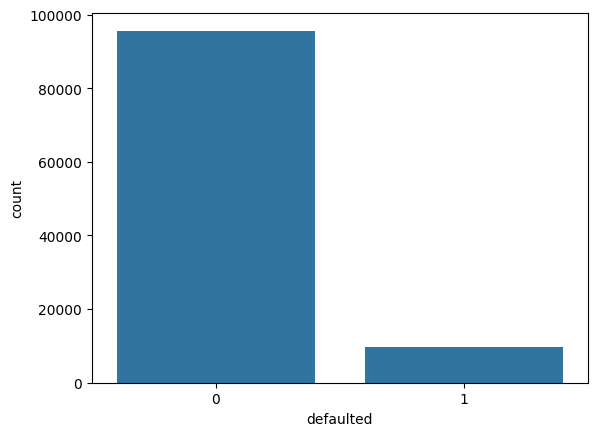

defaulted
0    95637
1     9779
Name: count, dtype: int64

In [20]:
sns.countplot(x = "defaulted",data = df)
plt.show()
df["defaulted"].value_counts()

In [21]:
udedr_df = df.copy()
udedr_df.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f13,f14,...,f746,f751,f756,f760,f764,f774,f776,f778,loss,defaulted
0,126,10,0.686842,1100,3,13699,7201.0,4949.0,7,0.7607,...,-0.9066,0.030594,0.028362,0.019636,1,0.1833,1,5,0,0
1,121,10,0.782776,1100,3,84645,240.0,1625.0,7,0.6555,...,-0.8294,0.120442,0.130160,0.115277,1,0.1926,1,5,0,0
2,126,10,0.500080,1100,3,83607,1800.0,1527.0,7,0.7542,...,-0.3632,0.226336,0.103307,0.219729,1,0.2521,1,5,0,0
3,134,10,0.439874,1100,3,82642,7542.0,1730.0,7,0.8017,...,-0.8812,0.054630,0.081205,0.056470,1,0.2498,1,5,0,0
4,109,9,0.502749,2900,4,79124,89.0,491.0,6,0.5263,...,-0.8760,0.085330,0.074286,0.067540,1,0.2282,0,5,0,0


In [22]:
#Resampling Data
from sklearn.utils import resample

#Seperate each target class into 2 dataframes
not_default = udedr_df[udedr_df['defaulted'] == 0]
default = udedr_df[udedr_df['defaulted'] == 1]

#Resample dataframe
undersample_df_d = resample(default,
                       replace = False,
                       n_samples = len(default),
                       random_state = 1234)

undersample_df_n = resample(not_default,
                       replace = False,
                       n_samples = len(default),
                       random_state = 1234)

undersample_df = pd.concat([undersample_df_n, undersample_df_d])

In [23]:
undersample_df.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f13,f14,...,f746,f751,f756,f760,f764,f774,f776,f778,loss,defaulted
77491,156,8,0.942584,4800,3,77393,5332.0,720.0,13,0.6641,...,0.5480,0.349807,0.195100,0.345894,1,0.2257,0,87,0,0
68930,159,2,0.632752,5500,4,76035,3092.0,1283.0,9,0.8966,...,-0.9227,0.240236,0.133920,0.229136,1,0.2161,1,32,0,0
13518,166,9,0.837009,5300,10,12290,2789.0,149.0,11,0.8333,...,0.8177,0.120909,0.195569,0.128696,1,0.1798,0,101,0,0
85349,125,8,0.405678,1600,3,78252,4583.0,3229.0,10,0.5917,...,-0.4086,0.116310,0.137460,0.111310,1,0.3228,0,54,0,0
35131,165,9,0.749624,3500,7,76831,4128.0,934.0,16,0.7833,...,1.2046,0.086836,0.137202,0.087141,1,0.2388,0,21,0,0


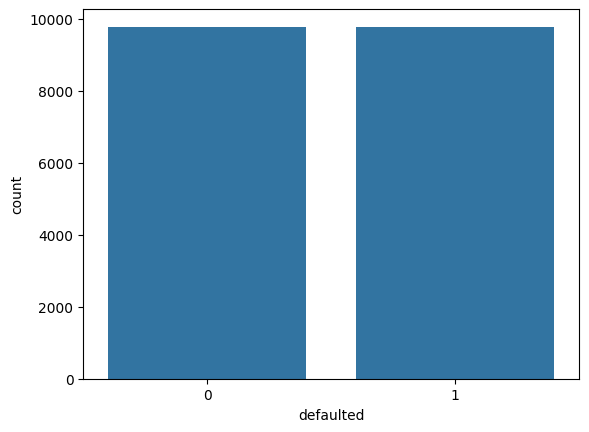

defaulted
0    9779
1    9779
Name: count, dtype: int64

In [24]:
sns.countplot(x = "defaulted",data = undersample_df)
plt.show()
undersample_df["defaulted"].value_counts()

In [25]:
over_df = df.copy()
over_df.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f13,f14,...,f746,f751,f756,f760,f764,f774,f776,f778,loss,defaulted
0,126,10,0.686842,1100,3,13699,7201.0,4949.0,7,0.7607,...,-0.9066,0.030594,0.028362,0.019636,1,0.1833,1,5,0,0
1,121,10,0.782776,1100,3,84645,240.0,1625.0,7,0.6555,...,-0.8294,0.120442,0.130160,0.115277,1,0.1926,1,5,0,0
2,126,10,0.500080,1100,3,83607,1800.0,1527.0,7,0.7542,...,-0.3632,0.226336,0.103307,0.219729,1,0.2521,1,5,0,0
3,134,10,0.439874,1100,3,82642,7542.0,1730.0,7,0.8017,...,-0.8812,0.054630,0.081205,0.056470,1,0.2498,1,5,0,0
4,109,9,0.502749,2900,4,79124,89.0,491.0,6,0.5263,...,-0.8760,0.085330,0.074286,0.067540,1,0.2282,0,5,0,0


In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

y = over_df['defaulted']
X = over_df.drop('defaulted', axis=1)

# Before oversampling
print("Class distribution before oversampling:")
print(y.value_counts())

# Apply SMOTE for oversampling
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X,y)

# After oversampling
print("\nClass distribution after oversampling:")
print(y_resampled.value_counts())

# Create a new DataFrame with oversampled data
oversampled_df = pd.DataFrame(X_resampled, columns=X.columns)
oversampled_df['defaulted'] = y_resampled

# Concatenate the oversampled data with the original DataFrame
over_df_with_oversampled = pd.concat([over_df, oversampled_df], ignore_index=True)

Class distribution before oversampling:
defaulted
0    95637
1     9779
Name: count, dtype: int64

Class distribution after oversampling:
defaulted
0    95637
1    95637
Name: count, dtype: int64


/var/folders/31/jxw1k_rs1cg66vdyd48c2ws00000gn/T/ipykernel_31299/1160074825.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  oversampled_df['defaulted'] = y_resampled


In [27]:
over_df_with_oversampled.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f13,f14,...,f746,f751,f756,f760,f764,f774,f776,f778,loss,defaulted
0,126,10,0.686842,1100,3,13699,7201.0,4949.0,7,0.7607,...,-0.9066,0.030594,0.028362,0.019636,1,0.1833,1,5,0,0
1,121,10,0.782776,1100,3,84645,240.0,1625.0,7,0.6555,...,-0.8294,0.120442,0.130160,0.115277,1,0.1926,1,5,0,0
2,126,10,0.500080,1100,3,83607,1800.0,1527.0,7,0.7542,...,-0.3632,0.226336,0.103307,0.219729,1,0.2521,1,5,0,0
3,134,10,0.439874,1100,3,82642,7542.0,1730.0,7,0.8017,...,-0.8812,0.054630,0.081205,0.056470,1,0.2498,1,5,0,0
4,109,9,0.502749,2900,4,79124,89.0,491.0,6,0.5263,...,-0.8760,0.085330,0.074286,0.067540,1,0.2282,0,5,0,0


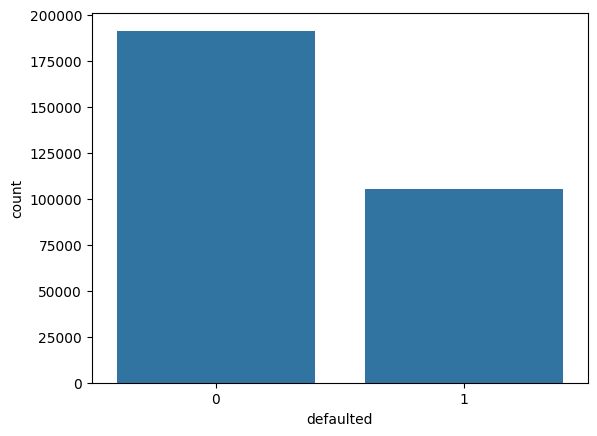

In [28]:
sns.countplot(x = "defaulted",data = over_df_with_oversampled)
plt.show()
#over_df_with_oversampled.value_counts()

## Classification Models

In [29]:
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score, recall_score

In [30]:
Y = over_df_with_oversampled['defaulted']
X = over_df_with_oversampled.drop(['loss', 'defaulted'], axis=1)

print(Y.shape)
print(X.shape)

(296690,)
(296690, 148)


In [31]:
scaler = StandardScaler()
scaler.fit_transform(X)

X_scale = scaler.fit_transform(X)

In [32]:
x_train, x_test, y_train, y_test = train_test_split(X_scale, Y, test_size= 0.25, stratify=Y, random_state=42)

print('x Train Shape:', x_train.shape)
print('y Train Shape:', y_train.shape)
print('x val Shape:', x_test.shape)
print('y val Shape:', y_test.shape)


x Train Shape: (222517, 148)
y Train Shape: (222517,)
x val Shape: (74173, 148)
y val Shape: (74173,)


### Decision Tree

#### Decision Tree Model

In [33]:
dt = DecisionTreeClassifier(max_depth=20, min_samples_leaf=1, min_samples_split=2)
dt.fit(x_train, y_train)


dt_train_pred = dt.predict(x_train)

prec_dt_train = precision_score(y_train, dt_train_pred)
recall_dt_train = recall_score(y_train, dt_train_pred)
f1_dt_train = f1_score(y_train, dt_train_pred)
accuracy_dt_train = accuracy_score(y_train, dt_train_pred)

print("Training Score")
print('Precision:', prec_dt_train)
print('Recall:', recall_dt_train)
print('F1 Score:', f1_dt_train)
print('Accuracy:', accuracy_dt_train)

print('---------------------------')

dt_pred = dt.predict(x_test)

prec_dt = precision_score(y_test, dt_pred)
recall_dt = recall_score(y_test, dt_pred)
f1_dt = f1_score(y_test, dt_pred)
accuracy_dt = accuracy_score(y_test, dt_pred)

print("Testing Score")
print('Precision:', prec_dt)
print('Recall:', recall_dt)
print('F1 Score:', f1_dt)
print('Accuracy:', accuracy_dt)



Training Score
Precision: 0.9721077914790535
Recall: 0.8983961953909589
F1 Score: 0.933799604283207
Accuracy: 0.9547405366780966
---------------------------
Testing Score
Precision: 0.9185272558766535
Recall: 0.8273506868027624
F1 Score: 0.8705581729617503
Accuracy: 0.9125827457430602


### Random Forest

In [34]:
rf = RandomForestClassifier(n_estimators=150, max_depth=20, min_samples_split=2)
rf.fit(x_train,y_train)

rf_train_pred = rf.predict(x_train)

prec_rf_train = precision_score(y_train, rf_train_pred)
recall_rf_train = recall_score(y_train, rf_train_pred)
f1_rf_train = f1_score(y_train, rf_train_pred)
accuracy_rf_train = accuracy_score(y_train, rf_train_pred)

print("Training Score")
print('Precision:', prec_rf_train)
print('Recall:', recall_rf_train)
print('F1 Score:', f1_rf_train)
print('Accuracy:', accuracy_rf_train)

print('---------------------------')

rf_pred = rf.predict(x_test)

prec_rf = precision_score(y_test, rf_pred)
recall_rf = recall_score(y_test, rf_pred)
f1_rf = f1_score(y_test, rf_pred)
accuracy_rf = accuracy_score(y_test, rf_pred)

print("Testing Score")
print('Precision:', prec_rf)
print('Recall:', recall_rf)
print('F1 Score:', f1_rf)
print('Accuracy:', accuracy_rf)

Training Score
Precision: 0.9967068734443806
Recall: 0.9876679062001973
F1 Score: 0.9921668032552554
Accuracy: 0.9944588503350306
---------------------------
Testing Score
Precision: 0.9920480430731
Recall: 0.9088942854974577
F1 Score: 0.9486524485633379
Accuracy: 0.9650411874941016


### XGBoost

In [35]:
xgb = XGBClassifier(booster = 'gbtree', eta = 0.05, max_depth = 20, subsample = 0.9)
xgb.fit(x_train, y_train)

xgb_train_pred = xgb.predict(x_train)

prec_xgb_train = precision_score(y_train, xgb_train_pred)
recall_xgb_train = recall_score(y_train, xgb_train_pred)
f1_xgb_train = f1_score(y_train, xgb_train_pred)
accuracy_xgb_train = accuracy_score(y_train, xgb_train_pred)

print("Training Score")
print('Precision:', prec_xgb_train)
print('Recall:', recall_xgb_train)
print('F1 Score:', f1_xgb_train)
print('Accuracy:', accuracy_xgb_train)

print('---------------------------')

xgb_pred = xgb.predict(x_test)

prec_xgb = precision_score(y_test, xgb_pred)
recall_xgb = recall_score(y_test, xgb_pred)
f1_xgb = f1_score(y_test, xgb_pred)
accuracy_xgb = accuracy_score(y_test, xgb_pred)

print("Testing Score")
print('Precision:', prec_xgb)
print('Recall:', recall_xgb)
print('F1 Score:', f1_xgb)
print('Accuracy:', accuracy_xgb)

Training Score
Precision: 1.0
Recall: 0.999911461890668
F1 Score: 0.9999557289854981
Accuracy: 0.999968541729396
---------------------------
Testing Score
Precision: 0.9997603163823753
Recall: 0.9496471123928056
F1 Score: 0.9740595870550918
Accuracy: 0.9820285009369987


### AdaBoost

In [36]:
base_estimator = DecisionTreeClassifier(max_depth=20, min_samples_leaf=1, min_samples_split=2)


adaboost_classifier = AdaBoostClassifier(estimator=base_estimator, n_estimators=50, random_state=42)


adaboost_classifier.fit(x_train, y_train)


adaboost_train_pred = adaboost_classifier.predict(x_train)


prec_adaboost_train = precision_score(y_train, adaboost_train_pred)
recall_adaboost_train = recall_score(y_train, adaboost_train_pred)
f1_adaboost_train = f1_score(y_train, adaboost_train_pred)
accuracy_adaboost_train = accuracy_score(y_train, adaboost_train_pred)

print("Training Score for AdaBoost")
print('Precision:', prec_adaboost_train)
print('Recall:', recall_adaboost_train)
print('F1 Score:', f1_adaboost_train)
print('Accuracy:', accuracy_adaboost_train)

print('---------------------------')


adaboost_test_pred = adaboost_classifier.predict(x_test)


prec_adaboost = precision_score(y_test, adaboost_test_pred)
recall_adaboost = recall_score(y_test, adaboost_test_pred)
f1_adaboost = f1_score(y_test, adaboost_test_pred)
accuracy_adaboost = accuracy_score(y_test, adaboost_test_pred)

print("Testing Score for AdaBoost")
print('Precision:', prec_adaboost)
print('Recall:', recall_adaboost)
print('F1 Score:', f1_adaboost)
print('Accuracy:', accuracy_adaboost)


Training Score for AdaBoost
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Accuracy: 1.0
---------------------------
Testing Score for AdaBoost
Precision: 0.9929399899142713
Recall: 0.9712757076724596
F1 Score: 0.9819883758847564
Accuracy: 0.987340406886603


### Final Comparison

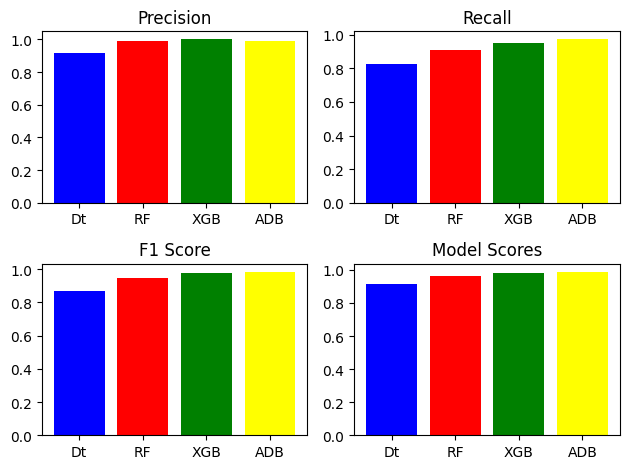

In [39]:
fig, axes = plt.subplots(nrows=2, ncols=2)

model_names = ["Dt", "RF", "XGB", "ADB"]

colors = ['blue', 'red', 'green', "yellow"]

axes[0,0].bar(model_names, [prec_dt, prec_rf, prec_xgb,prec_adaboost], color=colors)
axes[0,0].set_title("Precision")

axes[0,1].bar(model_names, [recall_dt, recall_rf, recall_xgb, recall_adaboost], color=colors)
axes[0,1].set_title("Recall")

axes[1,0].bar(model_names, [f1_dt, f1_rf, f1_xgb, f1_adaboost], color=colors)
axes[1,0].set_title("F1 Score")

axes[1,1].bar(model_names, [accuracy_dt, accuracy_rf, accuracy_xgb, accuracy_adaboost], color=colors)
axes[1,1].set_title("Accuracy")

plt.title('Model Scores')
plt.tight_layout()
plt.show()